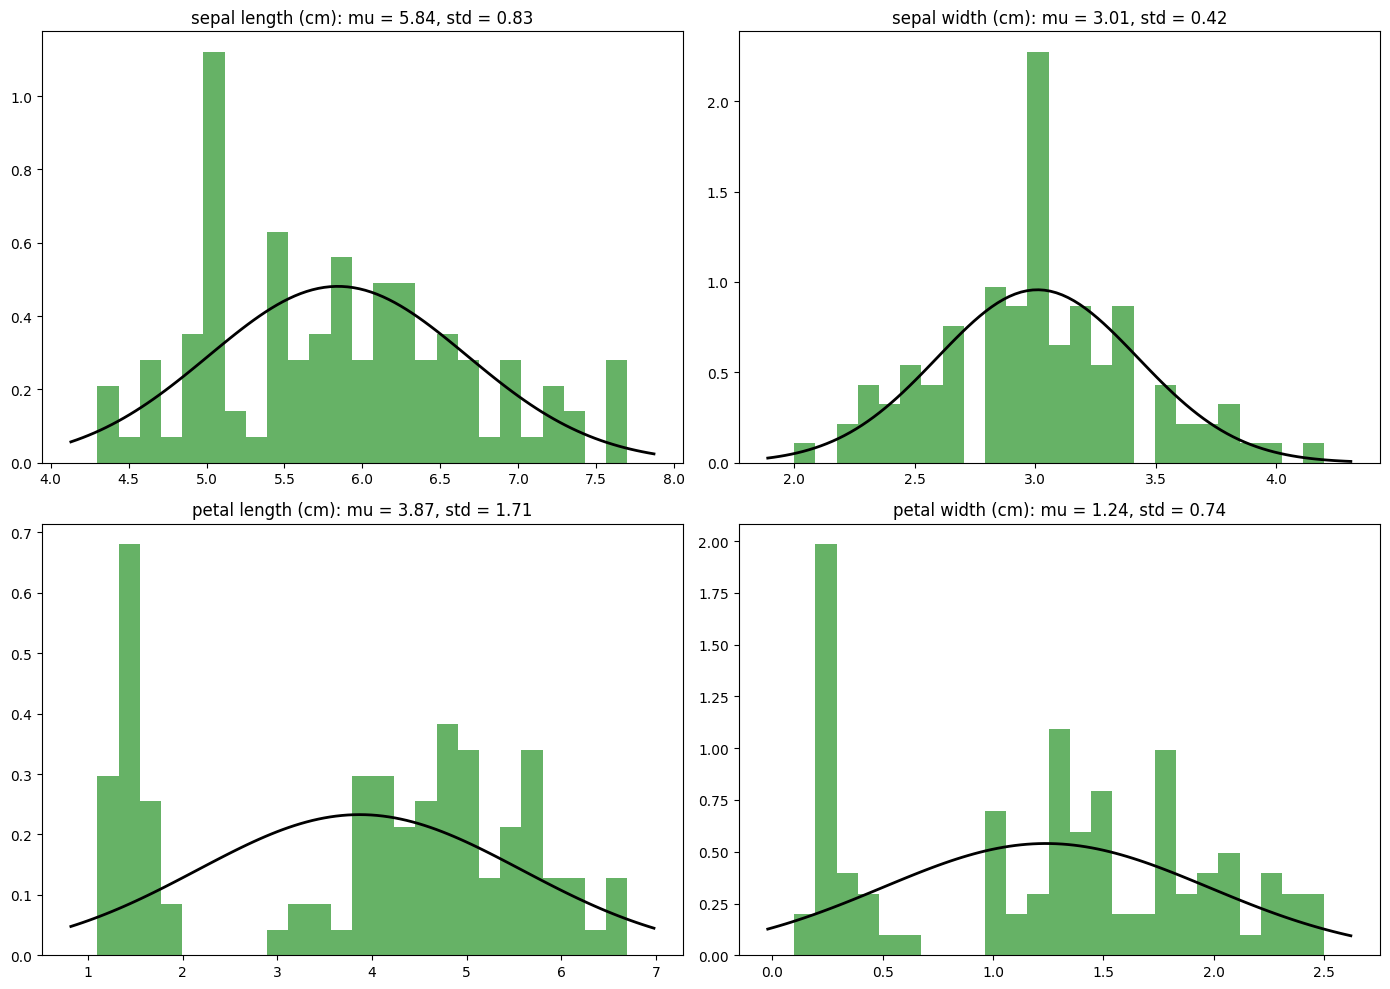

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from scipy.stats import norm, multivariate_normal

# Carregar o dataset Iris
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

# Separar a base de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Estimar e plotar a gaussiana 1D para cada característica dos dados de treino
plt.figure(figsize=(14, 10))
for i in range(X_train.shape[1]):
    feature = X_train[:, i]
    mu, std = norm.fit(feature)

    plt.subplot(2, 2, i + 1)
    plt.hist(feature, bins=25, density=True, alpha=0.6, color='g')

    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)

    plt.plot(x, p, 'k', linewidth=2)
    title = f"{feature_names[i]}: mu = {mu:.2f}, std = {std:.2f}"
    plt.title(title)

plt.tight_layout()
plt.show()



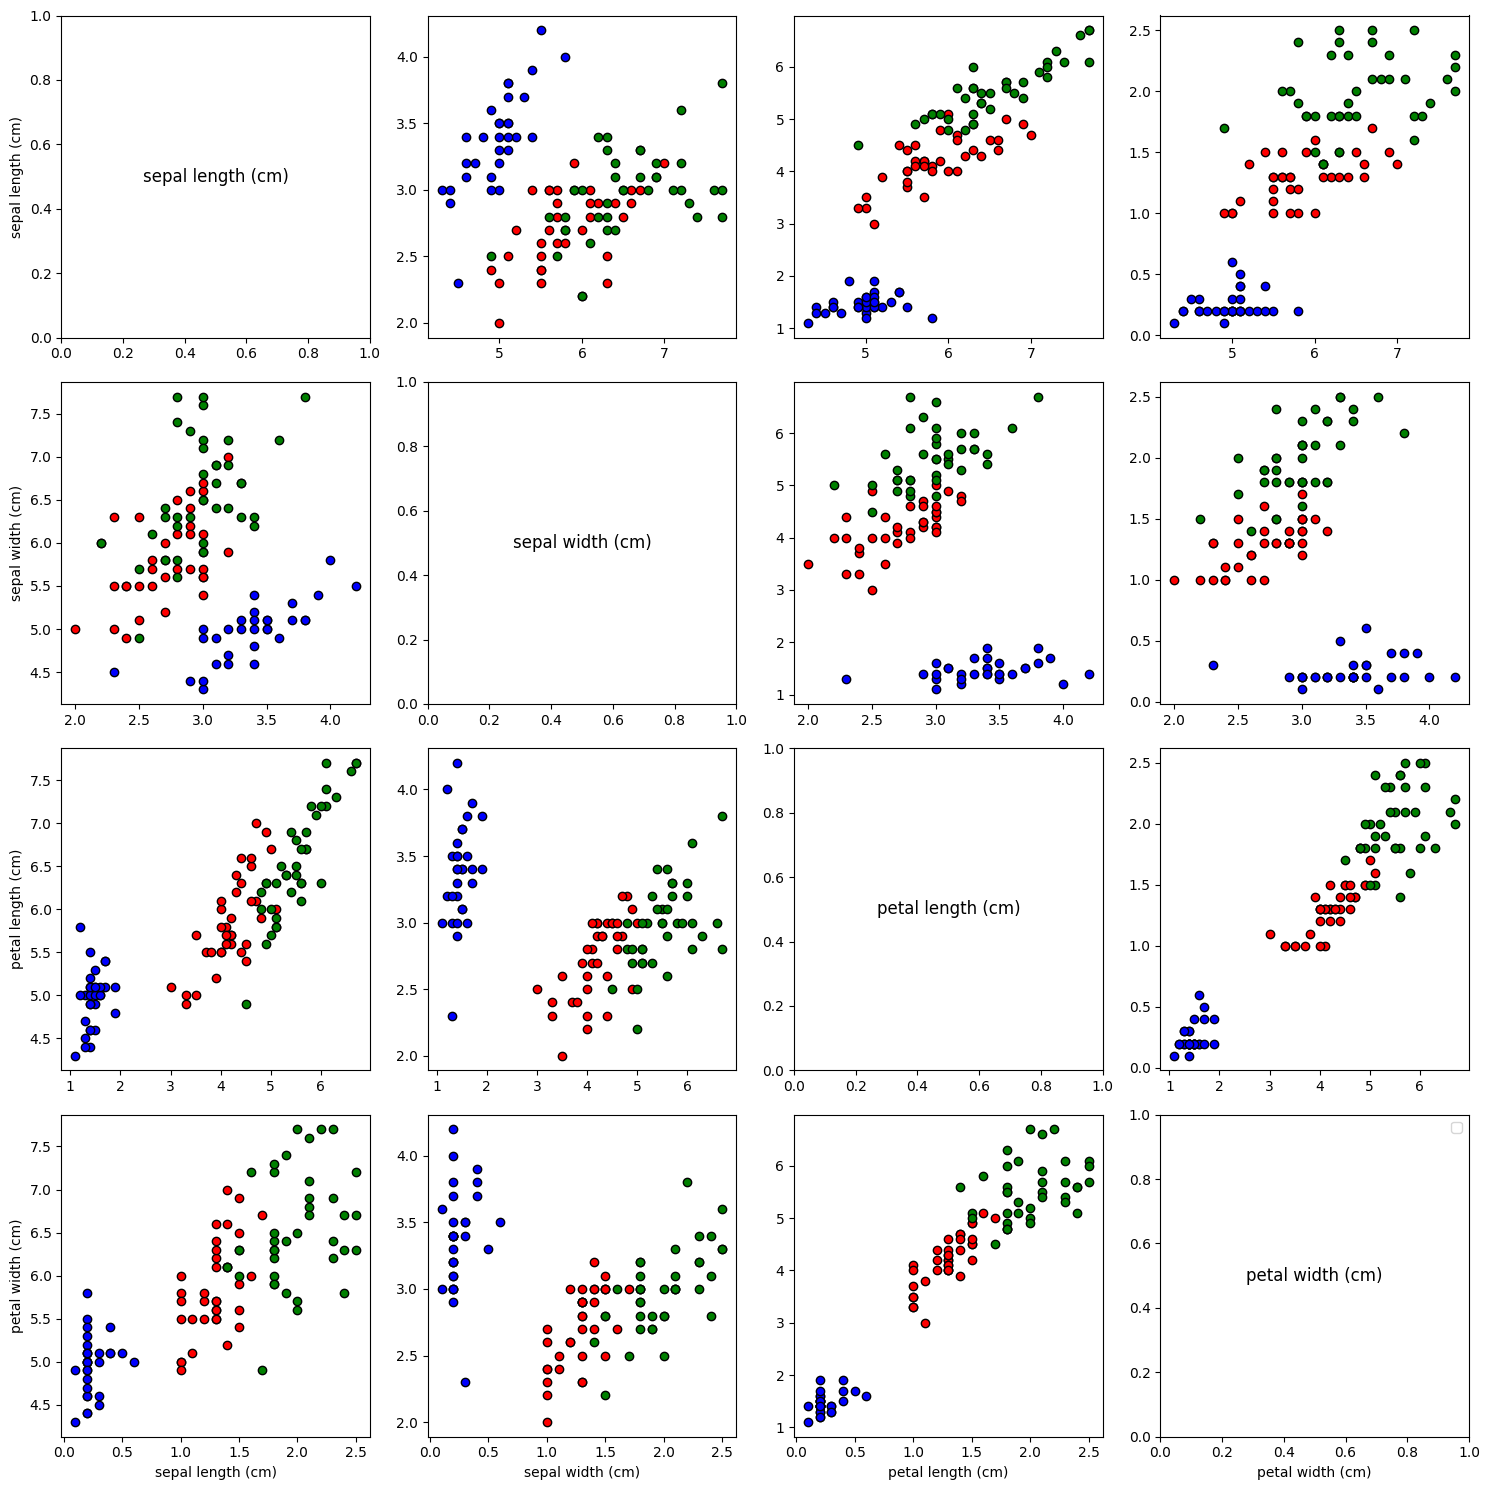

In [ ]:
# Scatterplot dos dados de treino
num_features = X_train.shape[1]
fig, axes = plt.subplots(nrows=num_features, ncols=num_features, figsize=(15, 15))
colors = ['blue', 'red', 'green']

for i in range(num_features):
    for j in range(num_features):
        ax = axes[i, j]
        if i != j:
            for k in range(len(np.unique(y_train))):
                ax.scatter(X_train[y_train == k, i], X_train[y_train == k, j], label=iris.target_names[k], color=colors[k], edgecolor='k')
        if i == num_features - 1:
            ax.set_xlabel(feature_names[j])
        if j == 0:
            ax.set_ylabel(feature_names[i])
        if i == j:
            ax.annotate(feature_names[i], (0.5, 0.5), xycoords='axes fraction', ha='center', va='center', fontsize=12)

plt.tight_layout()
plt.legend()
plt.show()


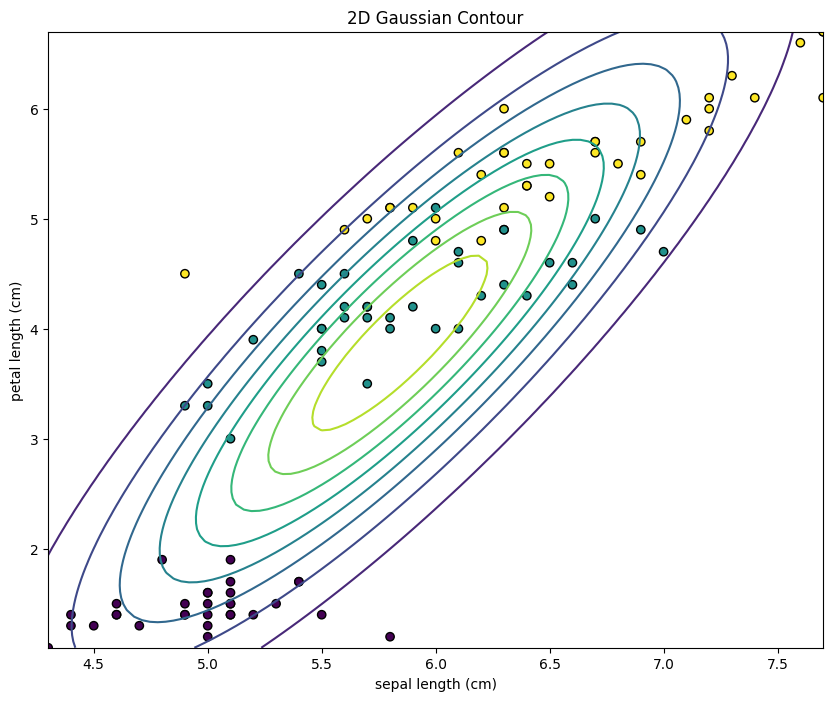

In [ ]:
# Escolher duas características, modelar e plotar a gaussiana 2D resultante
feature_x = 0  # sepal length (cm)
feature_y = 2  # petal length (cm)
X_train_selected = X_train[:, [feature_x, feature_y]]

mu = np.mean(X_train_selected, axis=0)
cov = np.cov(X_train_selected, rowvar=False)

# Criação do grid para o plot
x = np.linspace(X_train_selected[:, 0].min(), X_train_selected[:, 0].max(), 100)
y = np.linspace(X_train_selected[:, 1].min(), X_train_selected[:, 1].max(), 100)
X, Y = np.meshgrid(x, y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

rv = multivariate_normal(mu, cov)
Z = rv.pdf(pos)

# Plot da gaussiana 2D
plt.figure(figsize=(10, 8))
plt.contour(X, Y, Z, levels=10, cmap='viridis')
plt.scatter(X_train_selected[:, 0], X_train_selected[:, 1], c=y_train, cmap='viridis', edgecolor='k')
plt.xlabel(feature_names[feature_x])
plt.ylabel(feature_names[feature_y])
plt.title('2D Gaussian Contour')
plt.show()